In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt


## Paper count by year
Total Papers and Papers with Figures

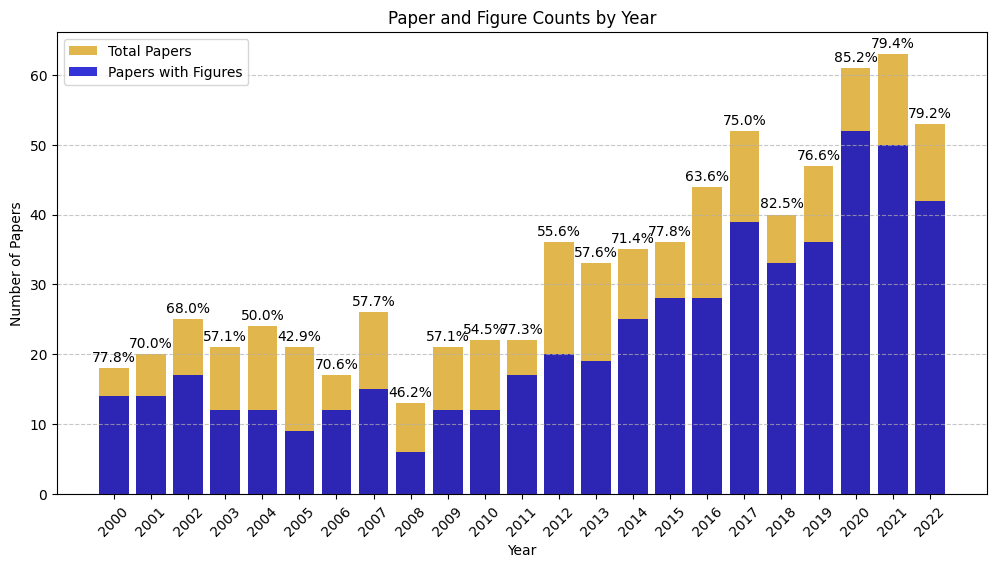

In [17]:
def count_papers_and_figures(base_directory, excel_directory):
    paper_counts = {}
    paper_with_figures_counts = {}
    
    for year in range(2000, 2023):  # From 2000 to 2022
        year_str = str(year)
        year_dir = os.path.join(base_directory, year_str)
        excel_path = os.path.join(excel_directory, f"{year}_cropped_and_labeled_figs.xlsx")
        
        # Count total papers, excluding non-paper files like .DS_Store
        if os.path.exists(year_dir):
            total_count = len([name for name in os.listdir(year_dir) if os.path.isfile(os.path.join(year_dir, name)) and name != '.DS_Store'])
        else:
            total_count = 0
        
        # Count papers with figures, assuming 'original paper' is the correct column name
        if os.path.exists(excel_path):
            df = pd.read_excel(excel_path)
            papers_with_figures = len(df['original paper'].unique())
        else:
            papers_with_figures = 0
        
        paper_counts[year_str] = total_count
        paper_with_figures_counts[year_str] = papers_with_figures
    
    return paper_counts, paper_with_figures_counts


def plot_paper_counts(paper_counts, paper_with_figures_counts):
    years = list(paper_counts.keys())
    total_counts = list(paper_counts.values())
    figures_counts = list(paper_with_figures_counts.values())
    
    # Creating the bar plot
    plt.figure(figsize=(12, 6))
    # Plot total papers bar
    plt.bar(years, total_counts, color='goldenrod', label='Total Papers', alpha=0.8)
    # Overlay papers with figures bar
    plt.bar(years, figures_counts, color='mediumblue', label='Papers with Figures', alpha=0.8)
    
    # Add titles, labels, and grid
    plt.title('Paper and Figure Counts by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Papers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    
    # Calculate and annotate each bar with the percentage
    for i, (total, figures) in enumerate(zip(total_counts, figures_counts)):
        if total > 0:  # Prevent division by zero
            percentage = (figures / total) * 100
            # Annotate on top of the total bar
            plt.text(years[i], total + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=8)


    plt.legend()
    
    # Display the plot
    plt.show()


# Define base directories
base_directory = '../papers_by_year'
excel_directory = '../cropped_and_labeled_image_data'

# Retrieve data
paper_counts, paper_with_figures_counts = count_papers_and_figures(base_directory, excel_directory)

# Plot the data
plot_paper_counts(paper_counts, paper_with_figures_counts)



## Average Figures per Paper
For all papers and papers with figures

## Figure types by year 
For papers that have figures
For categories and subcategories

## Diagram data counts by year 
'arrows', 'text with arrows', 'numbered steps', 'full cycles', 'start and end point', 'square components', 'circle components'
subcategories_to_check = ["process diagram","conceptual diagram", "cycle", "hierarchical diagram", "data structure", "data display", "data collection, data analysis, data gathering diagram", "data map", "organizational chart", "timeline"]
